In [189]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from os import listdir, mkdir
from os.path import isfile, join, exists
import time

%matplotlib inline

In [119]:
def gauss_compress_step(img):
    return cv.GaussianBlur(img, (5,5), 0)[::2, ::2, :].clip(0, 255).astype(np.uint8)

In [120]:
def compress_image(img):
    return gauss_compress_step(gauss_compress_step(img))

In [121]:
def show_image(img):
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.show()

In [139]:
def compress_all_jpg_in_directory(path):
    onlyfiles = [f for f in listdir(path) if isfile(join(path, f))]
    result_path = path + "_compress"
    if not exists(result_path):
        mkdir(result_path)
        
    for num, filename in enumerate(onlyfiles):
        img = cv.imread(path + "/" + filename)
        name = "pict_" + str(num) + ".png"
        compress_img = compress_image(img)
        cv.imwrite(result_path + "/" + name, compress_img)   

In [182]:
def draw_matches(img_first, keypoints_first, descriptor_first, 
                 img_second, keypoints_second, descriptor_second):
    bf = cv.BFMatcher(cv.NORM_L2, crossCheck=True)

    matches = bf.match(descriptor_first, descriptor_second)
    matches = sorted(matches, key = lambda x:x.distance)

    print(matches)
    
    img3 = cv.drawMatches(img_first, keypoints_first, img_second, keypoints_second, matches[:], img_second, flags=2)
    plt.imshow(img3)
    plt.show()

In [184]:
def match_accuracy(matches, count_all_features):
    first_set_idx = [matches[i].trainIdx for i in range(len(matches))]
    second_set_idx = [matches[i].queryIdx for i in range(len(matches))]
    first_set_count_features = len(set(first_set_idx))
    second_set_count_features = len(set(second_set_idx))
    
    return (first_set_count_features + second_set_count_features) / count_all_features    

In [192]:
def match_mean_distance(matches):
    return np.mean([matches[i].distance for i in range(len(matches))])

In [177]:
def calc_SIFT(img):
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    sift = cv.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(img, None)
    
    return keypoints, descriptors

In [239]:
def calc_AKAZE(img):
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    sift = cv.AKAZE_create()
    keypoints, descriptors = sift.detectAndCompute(img, None)
    
    return keypoints, descriptors

In [240]:
def calc_BRISK(img):
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    sift = cv.BRISK_create()
    keypoints, descriptors = sift.detectAndCompute(img, None)
    
    return keypoints, descriptors

In [203]:
def calc_process_images(origin_image, list_of_images, callback_descriptor, descriptor_name):
    origin_keypoints, origin_descriptors = callback_descriptor(origin_image)
    result_metrics = []
    if descriptor_name in ['SIFT', 'AKAZE']:
        bf = cv.BFMatcher(cv.NORM_L2, crossCheck=True)
    elif descriptor_name == 'BRISK':
        bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
    for current_image in list_of_images:
        start_time = time.time()
        
        current_keypoints, current_descriptors = callback_descriptor(current_image)
        matches = bf.match(origin_descriptors, current_descriptors)
        
        curr_time = time.time() - start_time
        
        accury = match_accuracy(matches, len(origin_keypoints) + len(current_keypoints))
        mean_distance = match_mean_distance(matches)
        result_metrics.append((accury, mean_distance, curr_time))
    
    return result_metrics

In [232]:
def prepare_data(path, need_compress=False):
    if need_compress:
        compress_all_jpg_in_directory(path)
        path = path + "_compress"
        
    
    list_of_images = []
    images = [f for f in listdir(path) if isfile(join(path, f))]
    for im in images:
        print(path + "/" + im)
        current_image = cv.imread(path + "/" + im)
        list_of_images.append(current_image)
    
    return list_of_images[0], list_of_images[1:]

In [247]:
def main_process(descriptor_name, path_to_folder_with_images, need_to_compress):
    #ну тут нужно харкодить))
    name_to_desc = {'SIFT': calc_SIFT, 'AKAZE': calc_AKAZE, 'BRISK': calc_BRISK}

    return calc_process_images(*prepare_data(path_to_folder_with_images, need_to_compress),
                               name_to_desc[descriptor_name], descriptor_name)

In [270]:
!ls

Untitled.ipynb		 kek.jpg  lab_3.ipynb	    samples
credit_card_clients.tsv  kek.png  picture	    sift_keypoints.jpg
files			 kek.zip  picture_compress  test.ipynb


In [272]:
result = main_process('SIFT', 'samples', False)

samples/pict_40.png
samples/pict_36.png
samples/pict_13.png
samples/pict_56.png
samples/pict_21.png
samples/pict_75.png
samples/pict_25.png
samples/pict_50.png
samples/pict_58.png
samples/pict_78.png
samples/pict_39.png
samples/pict_70.png
samples/pict_66.png
samples/pict_9.png
samples/pict_83.png
samples/pict_23.png
samples/pict_63.png
samples/pict_33.png
samples/pict_17.png
samples/pict_4.png
samples/pict_5.png
samples/pict_3.png
samples/pict_85.png
samples/pict_16.png
samples/pict_30.png
samples/pict_19.png
samples/pict_77.png
samples/pict_42.png
samples/pict_2.png
samples/pict_81.png
samples/pict_57.png
samples/pict_79.png
samples/pict_7.png
samples/pict_49.png
samples/pict_8.png
samples/pict_28.png
samples/pict_18.png
samples/pict_72.png
samples/pict_32.png
samples/pict_62.png
samples/pict_22.png
samples/pict_48.png
samples/pict_34.png
samples/pict_12.png
samples/pict_51.png
samples/pict_10.png
samples/pict_1.png
samples/pict_54.png
samples/pict_26.png
samples/pict_59.png
samples/

In [273]:
print(result)

[(0.23131443298969073, 295.70966413492613, 0.26137495040893555), (0.30329289428076256, 314.71611659458705, 0.311495304107666), (0.412821758135017, 232.86693248075596, 0.37520527839660645), (0.34327449786975045, 288.37121679427776, 0.34603309631347656), (0.24606060606060606, 287.1656969944245, 0.3034985065460205), (0.25526315789473686, 293.6862997992342, 0.22764849662780762), (0.2938076416337286, 293.1767144994351, 0.3376586437225342), (0.3008932769158439, 293.2327674627304, 0.345076322555542), (0.2071167883211679, 288.3765228204265, 0.40865612030029297), (0.33238797504254114, 295.41690420209346, 0.3509807586669922), (0.3500275178866263, 278.38287029626235, 0.3715939521789551), (0.32753062540296585, 294.9387093491442, 0.3183293342590332), (0.30420280186791193, 305.5645707113701, 0.3846590518951416), (0.2671206961785849, 287.2678969169811, 0.37644124031066895), (0.29970149253731343, 307.9270012236211, 0.4004859924316406), (0.3460698689956332, 281.62390969453924, 0.29288721084594727), (0.

Построим график match accuracy

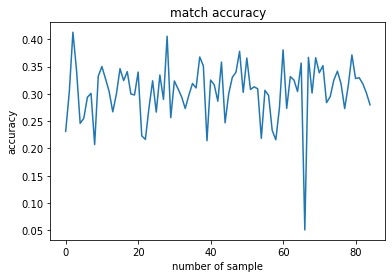

In [279]:
y = [result[i][0] for i in range(len(result))]
plt.plot(np.arange(len(y)), y)
plt.title('match accuracy')
#plt.xticks(np.arange(len(y)))
plt.xlabel('number of sample')
plt.ylabel('accuracy')
plt.show()

Построим график mean distance (среднее расстояние между сопоставненными дескрипторами)

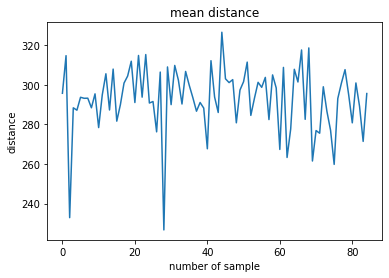

In [278]:
y = [result[i][1] for i in range(len(result))]
plt.plot(np.arange(len(y)), y)
plt.title('mean distance')
#plt.xticks(np.arange(len(y)))
plt.xlabel('number of sample')
plt.ylabel('distance')
plt.show()

График времени вычисления дескриптора и поиска соответствий

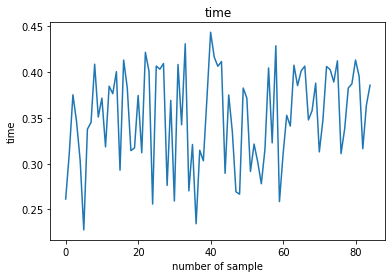

In [277]:
y = [result[i][2] for i in range(len(result))]
plt.plot(np.arange(len(y)), y)
plt.title('time')
#plt.xticks(np.arange(len(y)))
plt.xlabel('number of sample')
plt.ylabel('time')
plt.show()